<a href="https://colab.research.google.com/github/Sairahulreddynallapareddy/Health-data-/blob/main/Report_2_Data_Changping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Step 1: Load and preprocess data
filepath = "/content/PRSA_Data_Changping.csv"
df = load_and_preprocess_data(filepath)

if df is not None:
    print("Data loaded successfully!")
else:
    print("Failed to load data.")


Data loaded successfully!


In [26]:
# Step 2: Perform EDA
eda_results = perform_eda(df)
print("EDA complete. Check 'correlation_heatmap.png' and 'parameter_distributions.png'.")


EDA complete. Check 'correlation_heatmap.png' and 'parameter_distributions.png'.


In [27]:
# Step 3: Detect Outliers
outliers = detect_outliers(df)
print("Outlier detection complete.")


Outlier detection complete.


In [28]:
# Step 4: Normalize Data
df_normalized = normalize_data(df)
print("Data normalization complete.")


Data normalization complete.


In [29]:
import os

# ... (your existing code) ...

# Step 5: Aggregate Data by Station
station_aggregation = aggregate_by_station(df)
# Create the 'output' directory if it doesn't exist
os.makedirs('output', exist_ok=True)
station_aggregation.to_csv("output/station_aggregation.csv")
print("Data aggregation by station complete. Check 'station_aggregation.csv'.")

Data aggregation by station complete. Check 'station_aggregation.csv'.


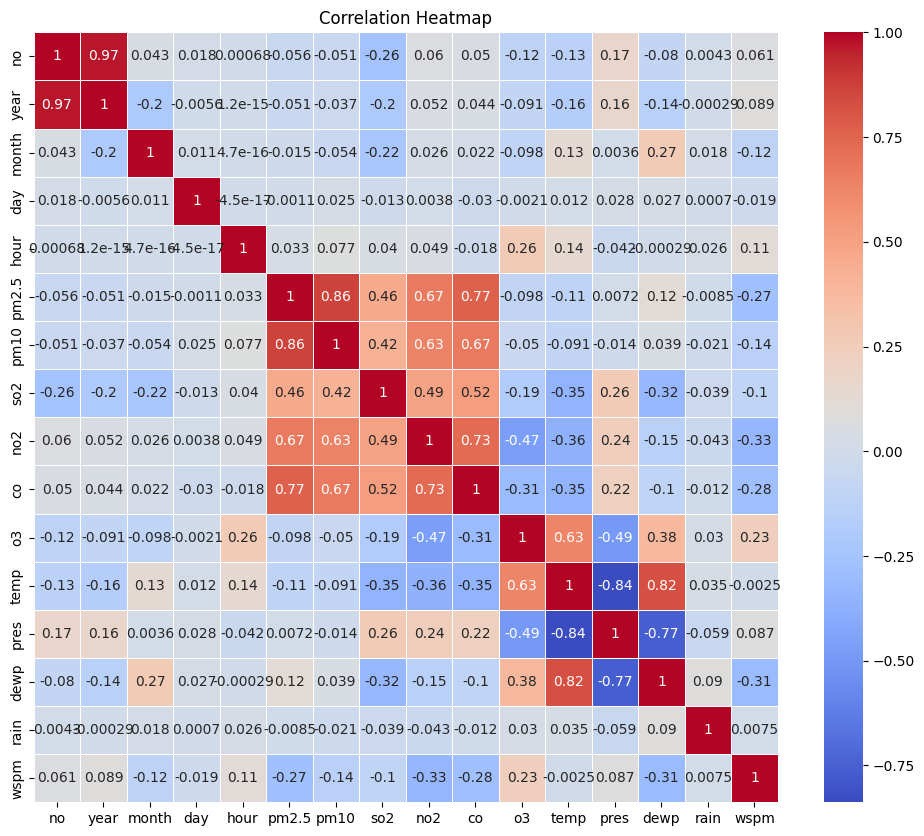

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_heatmap(df):
    """
    Plot a correlation heatmap using seaborn and matplotlib.

    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame containing the numeric data to visualize.

    Returns:
    --------
    None
    """
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    correlation_matrix = df[numeric_columns].corr()

    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

# Call the function
plot_correlation_heatmap(df)


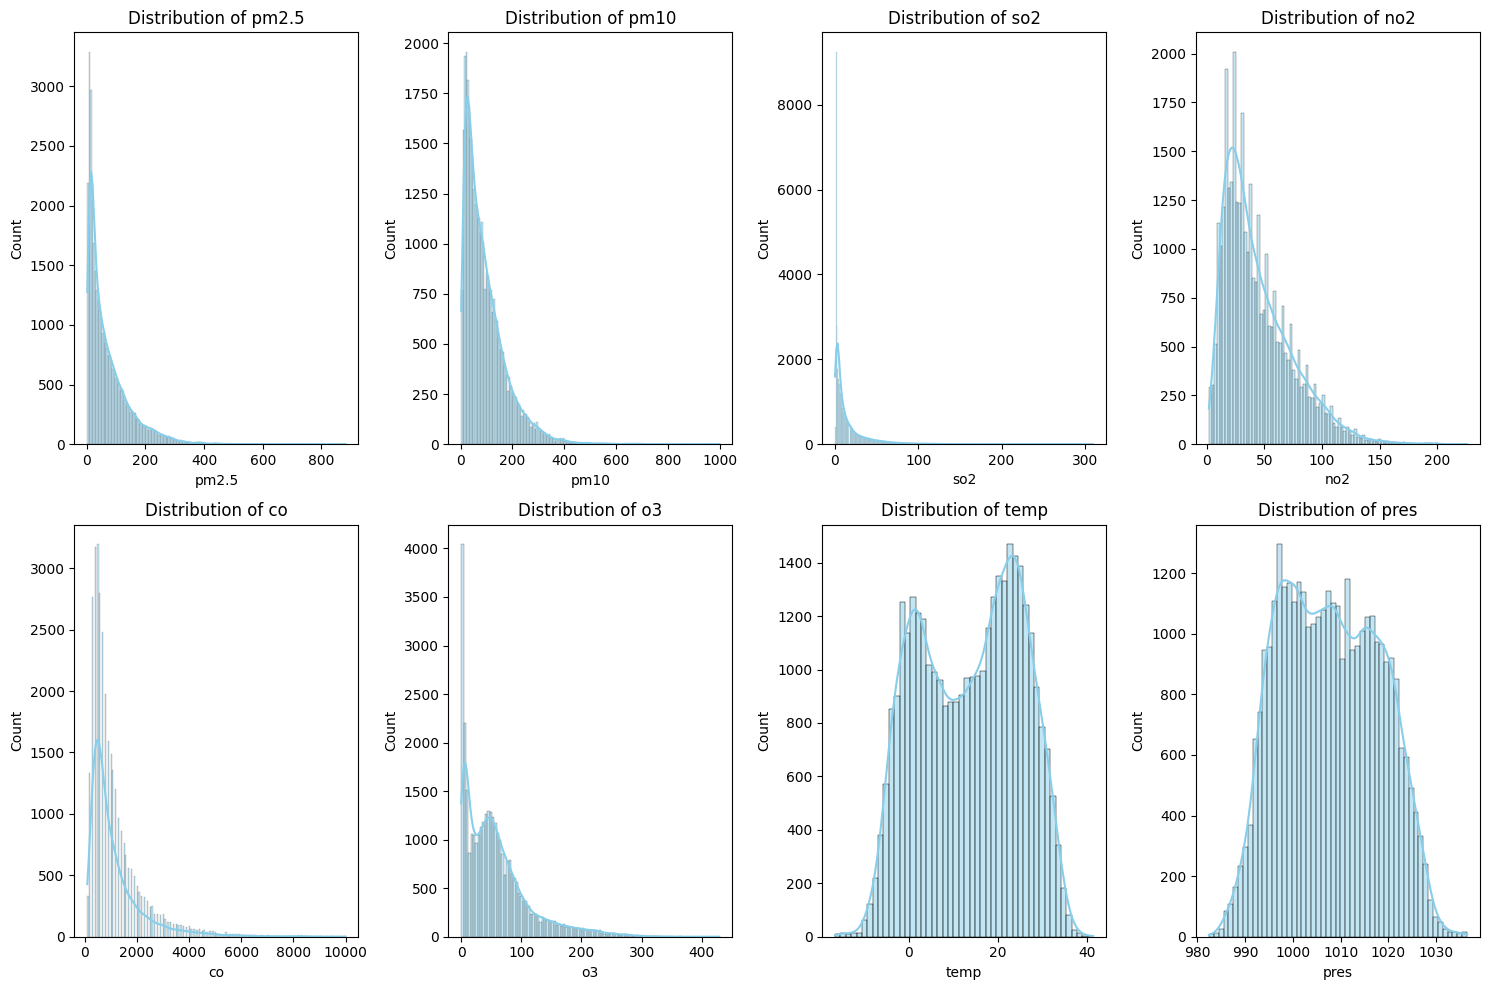

In [31]:
def plot_distributions(df, key_params):
    """
    Plot distribution plots for key parameters.

    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame containing the data.
    key_params : list
        List of column names to plot.

    Returns:
    --------
    None
    """
    plt.figure(figsize=(15, 10))
    for i, param in enumerate(key_params, 1):
        plt.subplot(2, 4, i)
        sns.histplot(df[param], kde=True, color='skyblue')
        plt.title(f'Distribution of {param}')
    plt.tight_layout()
    plt.show()

# Define key parameters to plot
key_params = ['pm2.5', 'pm10', 'so2', 'no2', 'co', 'o3', 'temp', 'pres']

# Call the function
plot_distributions(df, key_params)


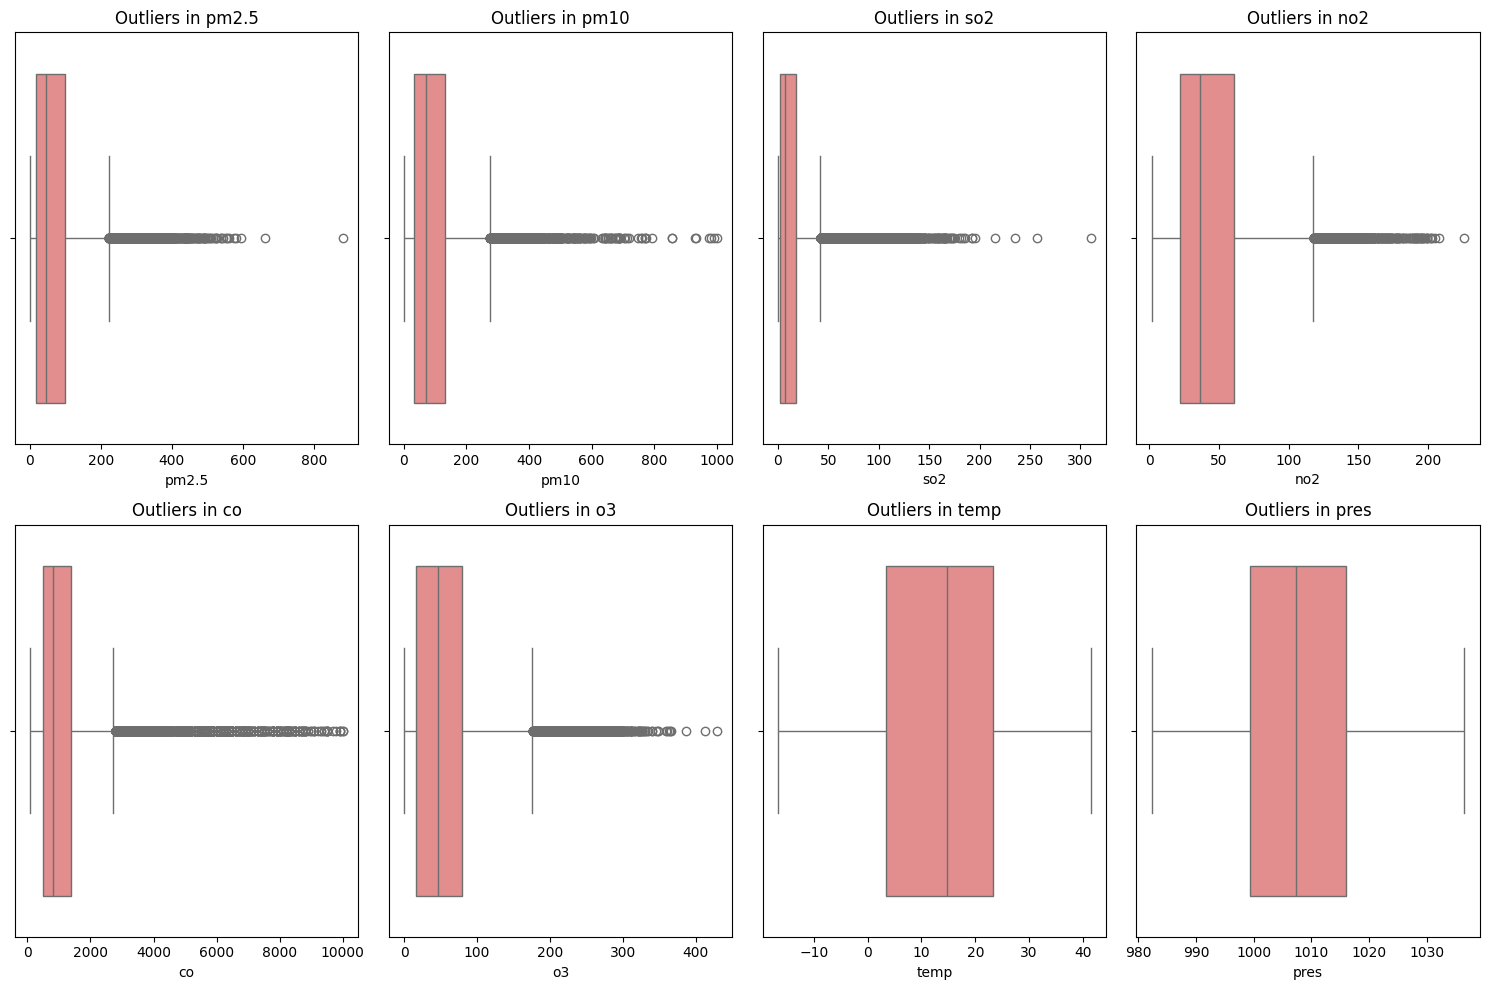

In [32]:
def plot_outliers(df, key_params):
    """
    Visualize outliers for key parameters using boxplots.

    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame containing the data.
    key_params : list
        List of column names to visualize.

    Returns:
    --------
    None
    """
    plt.figure(figsize=(15, 10))
    for i, param in enumerate(key_params, 1):
        plt.subplot(2, 4, i)
        sns.boxplot(x=df[param], color='lightcoral')
        plt.title(f'Outliers in {param}')
    plt.tight_layout()
    plt.show()

# Call the function
plot_outliers(df, key_params)


Mean Squared Error: 748.43


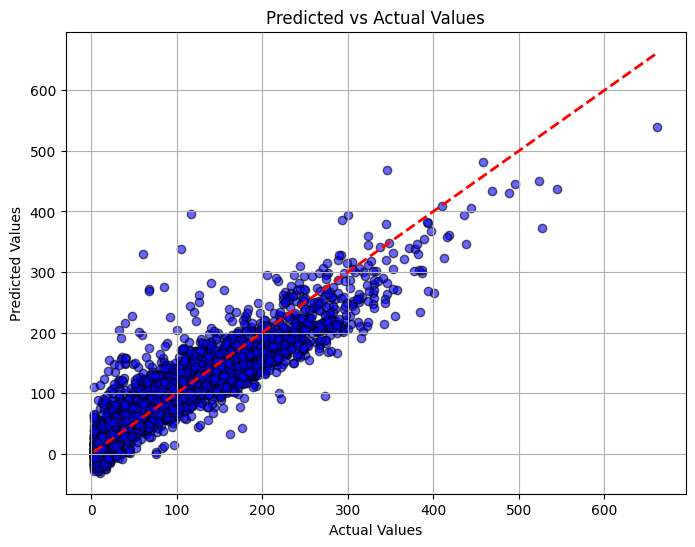

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def regression_analysis_and_plot(df, target_column):
    """
    Perform linear regression analysis and plot predicted vs actual values.

    Parameters:
    -----------
    df : pd.DataFrame
        Input DataFrame containing features and target.
    target_column : str
        Name of the target column.

    Returns:
    --------
    None
    """
    # Separate features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.2f}")

    # Plot predicted vs actual values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
    plt.title('Predicted vs Actual Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid()
    plt.show()

# Example usage:
# Assuming 'pm2.5' is the target column
target_column = 'pm2.5'
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Ensure no missing values in features or target column
df_clean = df[numeric_columns].dropna()

# Call the function
regression_analysis_and_plot(df_clean, target_column)
